<div style="background-color: #ffffff; padding: 20px; border-radius: 10px; width: 80%; margin: auto; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #4b0082; font-family: 'Arial', sans-serif; text-align: center;">AI Final Project</h1>
    <h2 style="color: #8a2be2; font-family: 'Arial', sans-serif; text-align: center;">Topic: Loan Approval Prediction</h2>
    <p style="color: #2f4f4f; font-family: 'Arial', sans-serif; text-align: center;">Author: </p> 
    <p style="color: #2f4f4f; font-family: 'Arial', sans-serif; text-align: justify;">
        Welcome to this AI Final Project report. In this project, we will analyze a dataset related to loan approval. 
        The first steps involve data cleaning, analysis, and visualization. The primary goal of this project is to build a predictive model for loan approval status 
        based on various features using two popular machine learning algorithms: Logistic Regression and K-Nearest Neighbors (KNN).
         Both models will be evaluated 
        and compared to determine the best approach for the dataset. This project will not only help uncover insights from the data 
        but also provide a comprehensive understanding of the factors influencing loan approval decisions.
    </p>
</div>


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 10px; width: 90%; margin: auto; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h1 style="color: #4b0082; font-family: 'Arial', sans-serif; text-align: center;">Loan Approval Classification Dataset Overview</h1>
    <p style="color: #2f4f4f; font-family: 'Arial', sans-serif; text-align: justify;">
        This dataset offers a comprehensive view of loan applications along with key financial and demographic attributes that contribute to assessing loan approval or rejection. The data includes both applicant-specific and loan-specific features that can help model the probability of loan approval. Below is a quick summary:
    </p>
</div>

## 🔢 Number of Records
45,000

## 🧩 Total Features
14 (mix of Categorical and Continuous types)

## 📝 Feature Descriptions

| Column                          | Description                                              | Data Type   |
|---------------------------------|----------------------------------------------------------|-------------|
| 👤 `person_age`                 | Applicant's age                                         | Float       |
| 🚻 `person_gender`              | Applicant's gender                                      | Categorical |
| 🎓 `person_education`           | Applicant's highest level of education                 | Categorical |
| 💰 `person_income`              | Applicant's annual income in currency                  | Float       |
| 📅 `person_emp_exp`             | Years of employment experience                         | Integer     |
| 🏠 `person_home_ownership`      | Home ownership status (e.g., rent, own, mortgage)      | Categorical |
| 🏦 `loan_amnt`                  | Amount of loan requested                               | Float       |
| 🎯 `loan_intent`                | Intended purpose of the loan (e.g., personal, education) | Categorical |
| 📈 `loan_int_rate`              | Interest rate applicable to the loan                   | Float       |
| 📊 `loan_percent_income`        | Loan amount as a percentage of annual income           | Float       |
| 🕰️ `cb_person_cred_hist_length` | Number of years of credit history                      | Float       |
| 💳 `credit_score`               | Applicant's credit score                               | Integer     |
| ❗ `previous_loan_defaults_on_file` | Indicator of previous loan defaults (Yes/No)           | Categorical |
| ✅ `loan_status`                | Loan status outcome (1 = approved, 0 = rejected)       | Integer     |

<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Import Required Libraries</span>

To analyze and visualize the dataset, we will use the following libraries:

- **<span style="color:#FF5722;">pandas</span>**: For data manipulation and analysis.
- **<span style="color:#FFC107;">numpy</span>**: For numerical operations and handling arrays.
- **<span style="color:#3F51B5;">matplotlib</span>**: For creating static, interactive, and dynamic visualizations.
- **<span style="color:#009688;">seaborn</span>**: For creating informative and attractive statistical graphics.

</div>


In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Load and Explore Dataset</span>

Load the dataset from the CSV file and perform initial exploration like checking the first few rows, data types, and summary statistics.

</div>


In [54]:
# Load the dataset from the CSV file
df = pd.read_csv('loan_data.csv')

In [55]:
# Display the first few rows of the dataset
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [56]:
# Get summary statistics of the dataset
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


<div style="background-color: #f0f4c3; padding: 20px; border-radius: 10px; width: 90%; margin: auto; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h2 style="color: #33691e; font-family: 'Arial', sans-serif; text-align: center;">Dataset Summary</h2>
    <p style="color: #558b2f; font-family: 'Arial', sans-serif; text-align: justify;">
        <strong>Shape of the dataset:</strong> (45,000, 14) - The dataset contains 45,000 records and 14 columns.
    </p>
    <h3 style="color: #827717; font-family: 'Arial', sans-serif;">Columns and Data Types:</h3>
    <ul style="color: #6d4c41; font-family: 'Arial', sans-serif;">
        <li><strong>float64:</strong> person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length</li>
        <li><strong>int64:</strong> person_emp_exp, credit_score, loan_status</li>
        <li><strong>object:</strong> person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file</li>
    </ul>
    <h3 style="color: #827717; font-family: 'Arial', sans-serif;">Statistical Summary:</h3>
    <ul style="color: #6d4c41; font-family: 'Arial', sans-serif;">
        <li>The <strong>person_age</strong> ranges from 20 to 144, which includes potential outliers (age > 100).</li>
        <li><strong>person_income</strong> has a mean of approximately 80,319 but also shows a high maximum value (7,200,766), indicating possible income outliers.</li>
        <li><strong>loan_amnt</strong> has a median of 8,000, with a max value of 35,000.</li>
        <li><strong>credit_score</strong> has a range from 390 to 850, which is typical for credit scores.</li>
        <li><strong>loan_status</strong> indicates that about 22% of loans were approved.</li>
    </ul>
</div>

In [57]:
# Check for missing values in the dataset
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [58]:
# Check for duplicated rows in the dataset
duplicated_rows = df[df.duplicated()]
print(f'Number of duplicated rows: {duplicated_rows.shape[0]}')

Number of duplicated rows: 0


In [59]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)

# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Unique Values in Each Column:
person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

Column: person_gender
Unique Values: ['female' 'male']

Column: person_educati

## 🔍 Summary of Unique Values and Column Types

### Unique Values in Each Column

| Column                               | Unique Values                             |
|--------------------------------------|-------------------------------------------|
| 👤 `person_age`                      | 60 unique values                         |
| 🚻 `person_gender`                   | 2 unique values (female, male)           |
| 🎓 `person_education`                | 5 unique values (Master, High School, Bachelor, Associate, Doctorate) |
| 💰 `person_income`                   | 33,989 unique values                     |
| 📅 `person_emp_exp`                  | 63 unique values                         |
| 🏠 `person_home_ownership`           | 4 unique values (RENT, OWN, MORTGAGE, OTHER) |
| 🏦 `loan_amnt`                       | 4,483 unique values                      |
| 🎯 `loan_intent`                     | 6 unique values (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION) |
| 📈 `loan_int_rate`                   | 1,302 unique values                      |
| 📊 `loan_percent_income`             | 64 unique values                         |
| 🕰️ `cb_person_cred_hist_length`      | 29 unique values                         |
| 💳 `credit_score`                    | 340 unique values                        |
| ❗ `previous_loan_defaults_on_file`  | 2 unique values (No, Yes)                |
| ✅ `loan_status`                     | 2 unique values (target variable)        |

### Column Types

- **Numerical Columns**: `person_age`, `person_income`, `person_emp_exp`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`, `credit_score`, `loan_status`
- **Categorical Columns**: `person_gender`, `person_education`, `person_home_ownership`, `loan_intent`, `previous_loan_defaults_on_file`

<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Data Visualization</span>


</div>


Visualize the distribution of the target variable 'loan_status'.

C:\Users\Tam\AppData\Local\Temp\ipykernel_11152\2016996823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


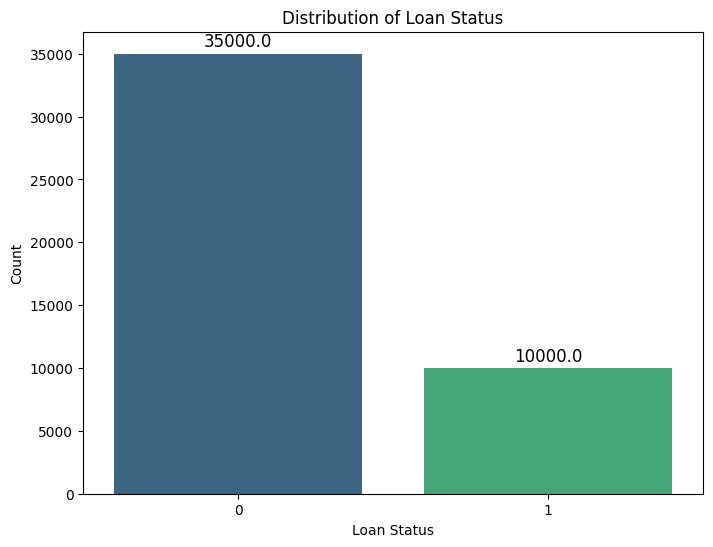

In [60]:
# Visualize Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Add count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Understanding how different features influence the loan approval rates.

<Figure size 1000x600 with 0 Axes>

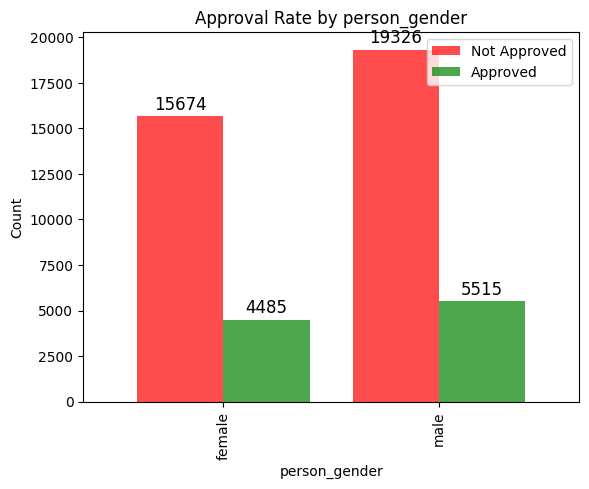

<Figure size 1000x600 with 0 Axes>

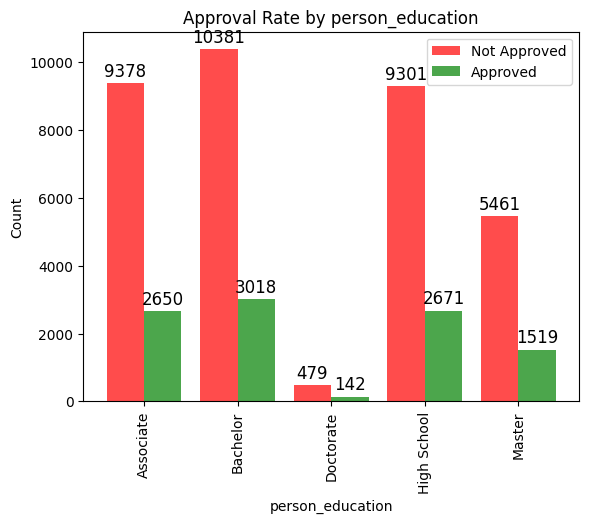

<Figure size 1000x600 with 0 Axes>

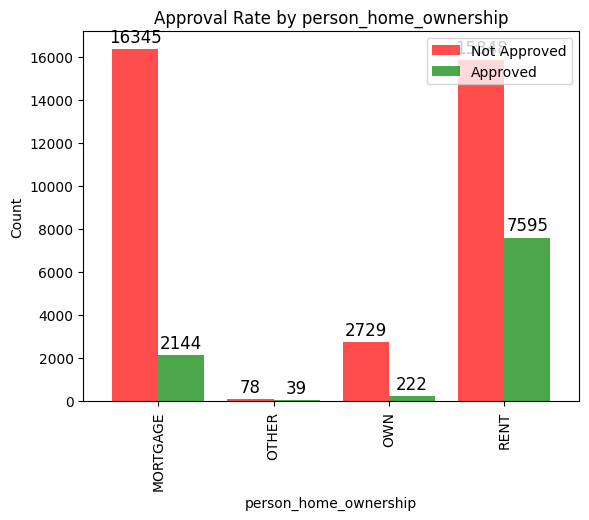

<Figure size 1000x600 with 0 Axes>

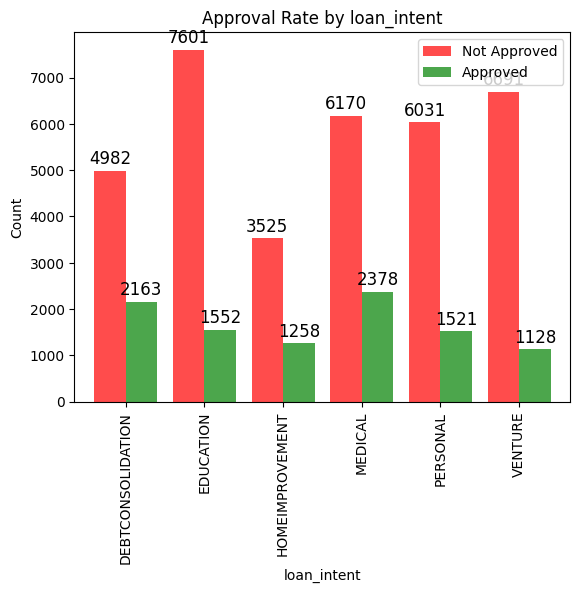

<Figure size 1000x600 with 0 Axes>

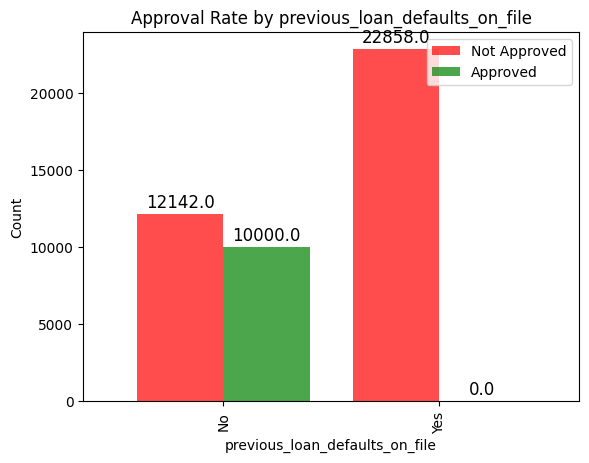

In [61]:
# Function to plot approval rates
def plot_approval_rate(feature):
    plt.figure(figsize=(10, 6))
    approval_counts = df.groupby([feature, 'loan_status']).size().unstack().fillna(0)
    approval_counts.plot(kind='bar', color=['red', 'green'], alpha=0.7, width=0.8)
    plt.title(f'Approval Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Not Approved', 'Approved'], loc='upper right')
    # Add count labels on top of the bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    plt.show()

# Plot approval rates for each feature
plot_approval_rate('person_gender')
plot_approval_rate('person_education')
plot_approval_rate('person_home_ownership')
plot_approval_rate('loan_intent')
plot_approval_rate('previous_loan_defaults_on_file')

Visualize the data using correlation matrix and distribution plots to understand relationships between variables.

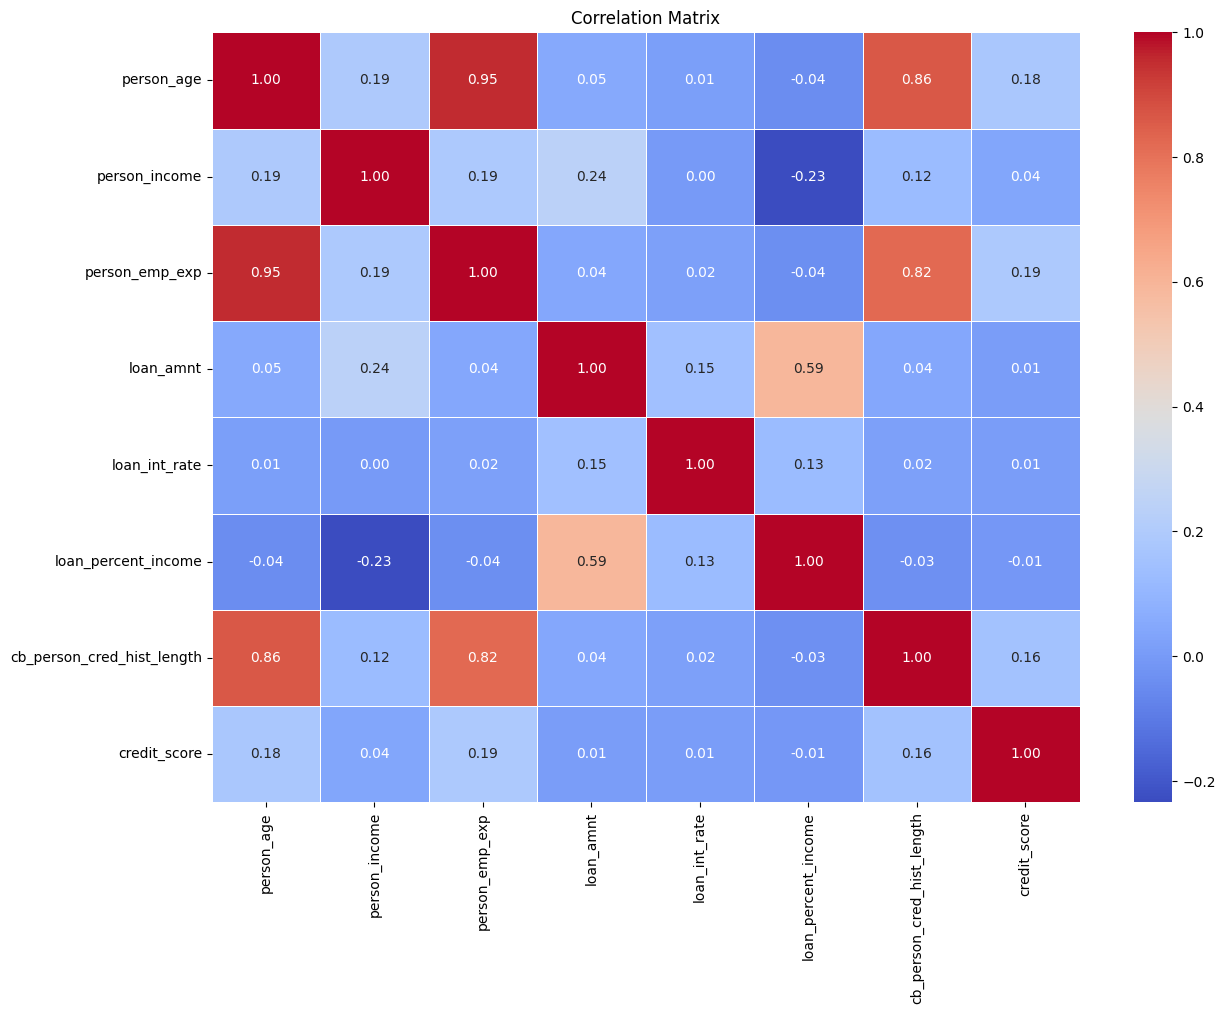

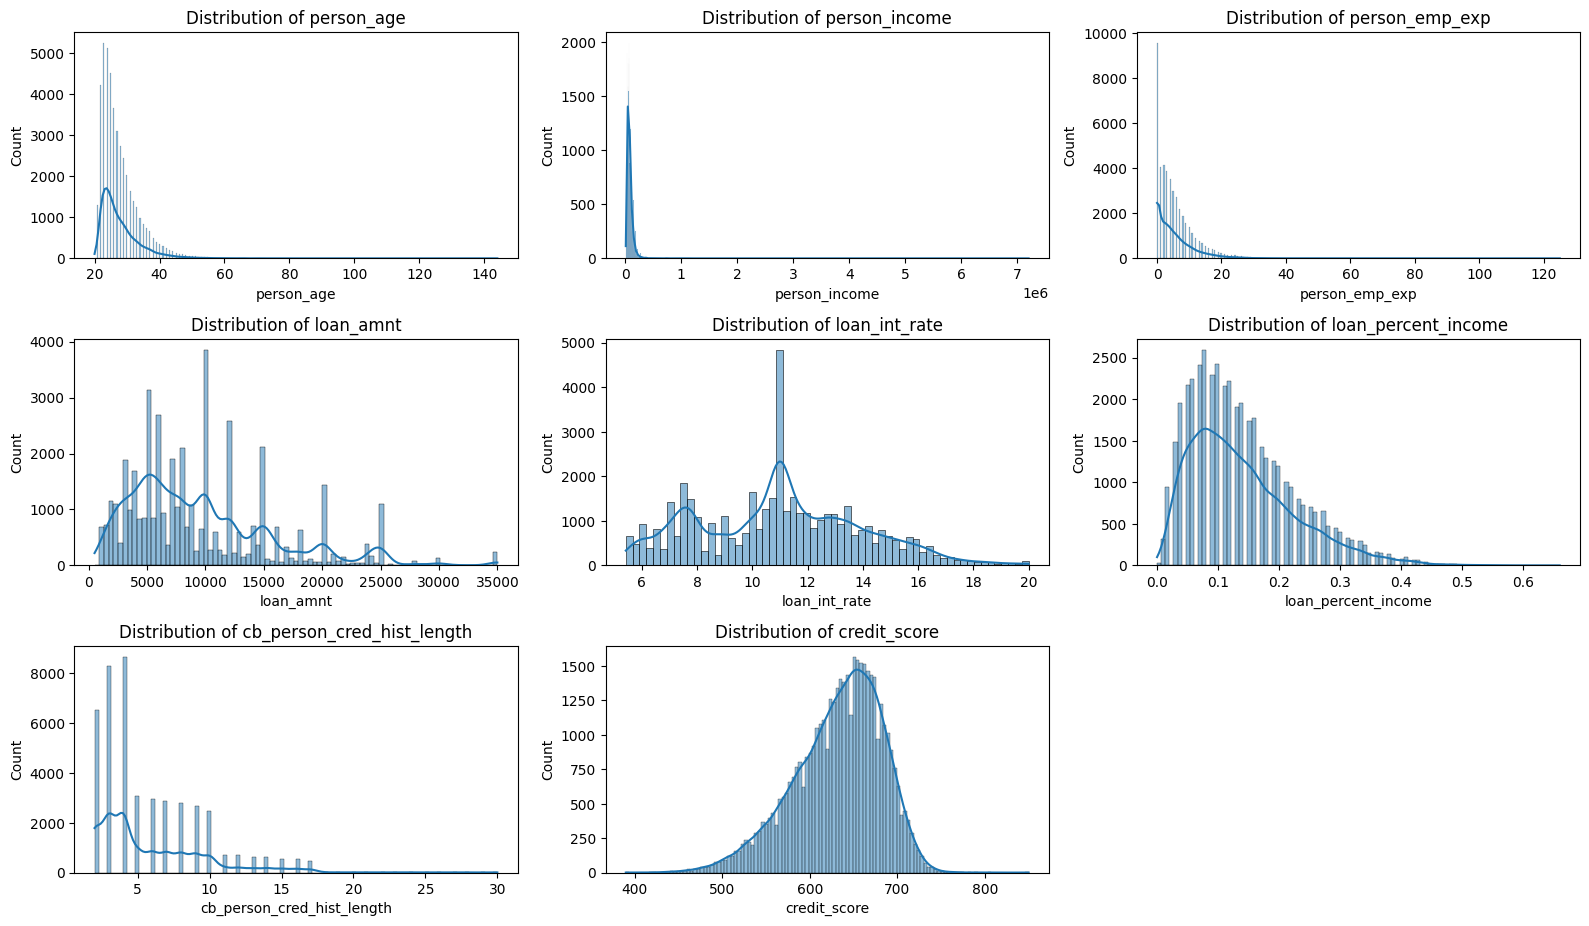

In [62]:
# Data Visualization
# Define numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Correlation matrix to visualize relationships between variables
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for numerical features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Map Categorical Values to Numerical Values</span>

Map categorical values to numerical values for easier processing.

</div>


In [63]:
# Map Categorical Values to Numerical Values

# Define mappings for categorical features
gender_mapping = {'female': 0, 'male': 1}
home_ownership_mapping = {'RENT': 0, 'OTHER': 1, 'MORTGAGE': 2, 'OWN': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'HOMEIMPROVEMENT': 3, 'VENTURE': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_on_file_mapping = {'No': 1, 'Yes': 0}
education_mapping = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5}

# Apply mappings to the dataset
df['person_gender'] = df['person_gender'].map(gender_mapping)
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_on_file_mapping)
df['person_education'] = df['person_education'].map(education_mapping)

# Display the first few rows of the modified dataset
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,1,1
1,21.0,0,1,12282.0,0,3,1000.0,1,11.14,0.08,2.0,504,0,0
2,25.0,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,1,1
3,23.0,0,3,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,1,1
4,24.0,1,4,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,1,1


<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Split Dataset into Training and Testing Sets</span>

Split the dataset into training and testing sets .

</div>


In [64]:
# Split Dataset into Training and Testing Sets

# Define the features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Define the test size and random seed
test_size = 0.2
random_seed = 42

# Shuffle the dataset
np.random.seed(random_seed)
shuffled_indices = np.random.permutation(len(X))

# Calculate the split index
split_index = int(len(X) * (1 - test_size))

# Split the dataset into training and testing sets
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (36000, 13)
Shape of X_test: (9000, 13)
Shape of y_train: (36000,)
Shape of y_test: (9000,)


<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Feature Scaling</span>

Normalize/scale the features for better performance.

</div>


In [65]:
# Define the Min-Max scaling function
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Apply the scaling to the training data
X_train_scaled = min_max_scaling(X_train)

# Apply the scaling to the testing data using the same min and max values from the training data
X_test_scaled = (X_test - X_train.min()) / (X_train.max() - X_train.min())

# Convert the scaled data back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training features
X_train_scaled.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
37979,0.096774,1.0,0.25,0.012355,0.080,0.666667,0.202899,0.2,0.042524,0.121212,0.285714,0.458696,1.0
9911,0.032258,1.0,0.25,0.006790,0.048,0.000000,0.246377,0.2,0.416324,0.242424,0.071429,0.558696,0.0
43386,0.016129,0.0,0.75,0.004073,0.000,0.000000,0.130435,0.4,0.648834,0.196970,0.071429,0.697826,1.0
13822,0.024194,0.0,0.50,0.004441,0.008,1.000000,0.130435,0.8,0.587791,0.196970,0.035714,0.450000,0.0
44810,0.177419,1.0,0.00,0.008338,0.160,0.666667,0.275362,0.6,0.685185,0.227273,0.321429,0.426087,1.0


<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Logistic Regression Implementation</span>

Implement logistic regression from scratch, including defining the sigmoid function, computing the cost function, computing gradients, the gradient descent algorithm and prediction function.

</div>


Define sigmoid function

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- \( z \): The input value (scalar or vector).
- \( g(z) \): The output value, which lies in the range (0, 1).


In [66]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Logistic Regression Cost Function

The cost function for logistic regression is defined as:

$$
   J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right]
   $$

Where:
- \( J(w, b) \): The cost function.
- \( m \): The number of training examples.
- \( y^(i) \): The actual label for the \( i \)-th example (\( 0 \) or \( 1 \)).
- \( g(z^(i)) = 1/(1 + e^(-z^(i)) \): The predicted probability for the \( i \)-th example.
- \( w \): The weight parameters of the logistic regression model.
- \( x^(i) \): The input features for the \( i \)-th example.
- \( b \): The bias term.

The cost function \( J(w, b) \) measures how well the logistic regression model is performing. It is used to find the optimal parameters \( w \) and \( b \) that minimize the cost.

In [67]:
# Define the cost function
def compute_cost(y, y_pred):
    m = y.size
    cost = -1/m * (np.dot(y, np.log(y_pred)) + np.dot((1 - y), np.log(1 - y_pred)))
    return cost

Gradient Descent

Gradient Descent is an optimization algorithm used to minimize the cost function \( J(w, b) \) by iteratively updating the parameters \( w \) (weights) and \( b \) (bias).

Update Rules:

The parameters are updated using the following formulas:

1. **For weights \( w_j \):**
   $$
   w_j := w_j - \alpha \frac{\partial J}{\partial w_j}
   $$
   Where:
   $$
   \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \left( g(z^{(i)}) - y^{(i)} \right) x_j^{(i)}
   $$

2. **For bias \( b \):**
   $$
   b := b - \alpha \frac{\partial J}{\partial b}
   $$
   Where:
   $$
   \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \left( g(z^{(i)}) - y^{(i)} \right)
   $$


Gradient Descent works by calculating the gradient (partial derivatives) of the cost function with respect to each parameter and updating the parameters in the direction that reduces the cost function.

In [68]:
# Gradient Descent

# Define the logistic regression model with gradient descent
def logistic_regression(X, y, learning_rate, epochs):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    
    # List to store cost values
    costs = []
    
    # Gradient descent
    for epoch in range(epochs):
        # Linear combination
        z = np.dot(X, w) + b
        # Apply sigmoid function
        y_pred = sigmoid(z)
        
        # Compute cost
        cost = compute_cost(y, y_pred)
        costs.append(cost)
        
        # Compute gradients
        dw = np.dot(X.T, (y_pred - y)) / y.size
        db = np.sum(y_pred - y) / y.size
        
        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Print cost every 1000 epochs
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Cost: {cost}')
    return w, b, costs

Prediction Function

The prediction function computes the predicted probabilities and classifies them based on a threshold of \( 0.5 \).

For an input matrix \( X \), weights \( w \), and bias \( b \), the predicted output \( \hat{y} \) is given by the following steps:

1. **Compute the linear combination**:
   $$
   z = Xw + b
   $$

2. **Apply the sigmoid activation function**:
   $$
   y_{\text{pred}} = \sigma(z) = \frac{1}{1 + e^{-z}}
   $$

3. **Classify the predictions**:
   $$
   \hat{y} = 
   \begin{cases} 
   1 & \text{if } y_{\text{pred}} \geq 0.5 \\
   0 & \text{if } y_{\text{pred}} < 0.5 
   \end{cases}
   $$



The function returns a list of predicted class labels (0 or 1) based on the threshold of 0.5.


In [69]:
# Define the prediction function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return [1 if i >= 0.5 else 0 for i in y_pred]

Train the Model


Set Hyperparameters
   - Learning rate ( alpha = 0.01 )
   - Number of epochs ( epochs = 200000 )




In [70]:
# Train the Model

# Set hyperparameters
learning_rate = 0.01
epochs = 10000
# Train the logistic regression model
w, b, costs = logistic_regression(X_train_scaled.values, y_train.values, learning_rate, epochs)

Epoch 0, Cost: 0.6931471805599461
Epoch 1000, Cost: 0.45577669833164947
Epoch 2000, Cost: 0.40350909404497026
Epoch 3000, Cost: 0.3740815958188044
Epoch 4000, Cost: 0.3552000806371039
Epoch 5000, Cost: 0.34189216933276084
Epoch 6000, Cost: 0.33186302178965077
Epoch 7000, Cost: 0.3239286659869252
Epoch 8000, Cost: 0.3174214276669683
Epoch 9000, Cost: 0.3119371403462838


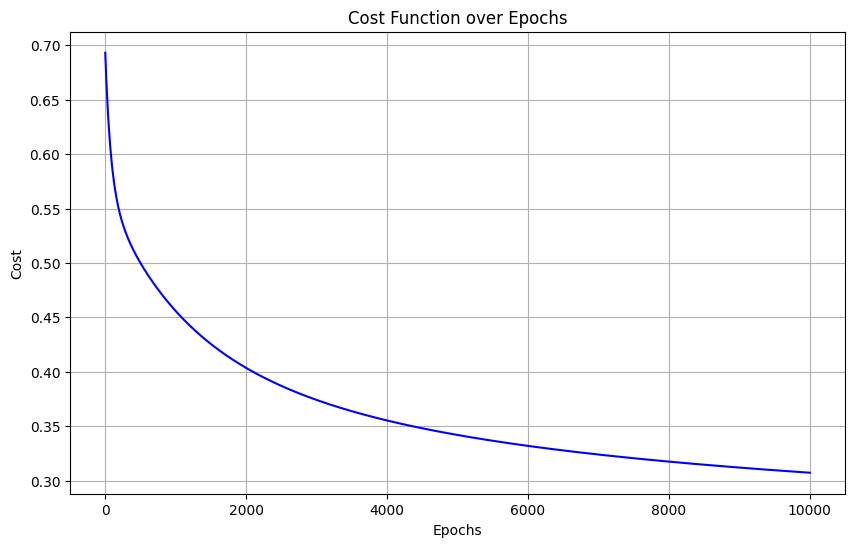

In [71]:
# Plot the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), costs, color='blue')
plt.title('Cost Function over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

Predicting and Calculating Metrics

1. **Predict on the Training and Testing Set:**

   We first make predictions for the training and testing sets using the logistic regression model.

   - For the training set:
     $$
     \hat{y}_{\text{train}} = \text{predict}(X_{\text{train}}, w, b)
     $$

   - For the testing set:
     $$
     \hat{y}_{\text{test}} = \text{predict}(X_{\text{test}}, w, b)
     $$

2. **Calculate Accuracy:**

   The accuracy is calculated as the proportion of correct predictions in the training and testing sets. It is defined as:

   - For the training set:
     $$
     \text{train\_accuracy} = \frac{1}{m_{\text{train}}} \sum_{i=1}^{m_{\text{train}}} \mathbf{1} (\hat{y}_{\text{train}}^{(i)} = y_{\text{train}}^{(i)})
     $$

   - For the testing set:
     $$
     \text{test\_accuracy} = \frac{1}{m_{\text{test}}} \sum_{i=1}^{m_{\text{test}}} \mathbf{1} (\hat{y}_{\text{test}}^{(i)} = y_{\text{test}}^{(i)})
     $$

   Where \( m_train \) and \( m_test \) are the number of examples in the training and testing sets, respectively.

3. **Calculate Precision, Recall, and F1 Score:**

   Precision, recall, and F1 score are calculated as follows:

   - **True Positives (TP):**
     $$
     TP = \sum_{i=1}^{m_{\text{test}}} \mathbf{1}(y_{\text{test}}^{(i)} = 1 \text{ and } \hat{y}_{\text{test}}^{(i)} = 1)
     $$

   - **False Positives (FP):**
     $$
     FP = \sum_{i=1}^{m_{\text{test}}} \mathbf{1}(y_{\text{test}}^{(i)} = 0 \text{ and } \hat{y}_{\text{test}}^{(i)} = 1)
     $$

   - **False Negatives (FN):**
     $$
     FN = \sum_{i=1}^{m_{\text{test}}} \mathbf{1}(y_{\text{test}}^{(i)} = 1 \text{ and } \hat{y}_{\text{test}}^{(i)} = 0)
     $$

   - **Precision:**
     $$
     \text{precision} = \frac{TP}{TP + FP} \quad \text{if } (TP + FP) > 0, \text{ else } 0
     $$

   - **Recall:**
     $$
     \text{recall} = \frac{TP}{TP + FN} \quad \text{if } (TP + FN) > 0, \text{ else } 0
     $$

   - **F1 Score:**
     $$
     F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}} \quad \text{if } (\text{precision} + \text{recall}) > 0, \text{ else } 0
     $$

4. **Display the Results:**

   Finally, the computed precision, recall, and F1 score are printed as:

   - Precision:
     $$
     \text{Precision} = \text{precision}
     $$

   - Recall:
     $$
     \text{Recall} = \text{recall}
     $$

   - F1 Score:
     $$
     \text{F1 Score} = \text{f1}
     $$


In [72]:
# Predict on the training set
y_train_pred = predict(X_train_scaled.values, w, b)

# Predict on the testing set
y_test_pred = predict(X_test_scaled.values, w, b)

# Calculate accuracy
train_accuracy = np.mean(y_train_pred == y_train.values)
test_accuracy = np.mean(y_test_pred == y_test.values)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

# Calculate precision, recall, and F1 score for the testing set
def calculate_metrics(y_true, y_pred):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Tính Precision, Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Tính F1 Score
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1


precision, recall, f1 = calculate_metrics(y_test.values, y_test_pred)

# Hiển thị kết quả
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Training Accuracy: 86.02%
Testing Accuracy: 86.16%
Precision: 0.70
Recall: 0.65
F1 Score: 0.67


Confusion matrix

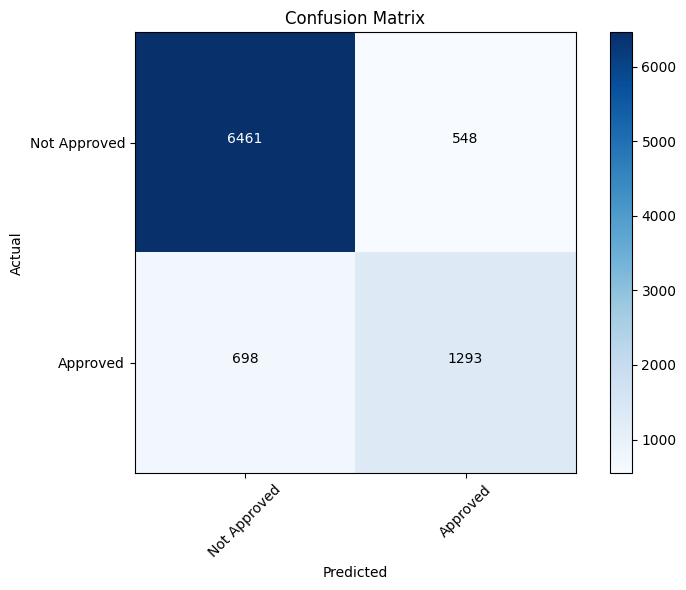

In [73]:
#Confusion matrix

def plot_confusion_matrix(y_true, y_pred):
    # Initialize the confusion matrix
    cm = np.zeros((2, 2), dtype=int)
    
    # Populate the confusion matrix
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1 
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Not Approved', 'Approved'], rotation=45)
    plt.yticks(tick_marks, ['Not Approved', 'Approved'])
    
    # Annotate the confusion matrix
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# Use the function
plot_confusion_matrix(y_test.values, y_test_pred)

<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">K-Nearest Neighbors (KNN) Implementation</span>

Implement K-Nearest Neighbors (KNN) from scratch, including defining the Euclidean distance function, finding the k-nearest neighbors, predicting the class, and making predictions on the test set using vectorized operations.

</div>

Function to calculate Euclidean distance using vectorized operations
\begin{align*}
\text{Euclidean Distance} &= \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \\
\text{where} \\
x_i &\text{ is the i-th feature of the test instance} \\
y_i &\text{ is the i-th feature of the training instance}
\end{align*}

In [74]:
def euclidean_distance_vectorized(X_train, test_instance):
    return np.sqrt(np.sum((X_train - test_instance) ** 2, axis=1))

Function to get k-nearest neighbors using vectorized operations

In [75]:
def get_neighbors_vectorized(X_train, y_train, test_instance, k):
    distances = euclidean_distance_vectorized(X_train, test_instance)
    sorted_indices = np.argsort(distances)
    neighbors = y_train[sorted_indices[:k]]
    return neighbors

Function to predict the class using vectorized operations

In [76]:
def predict_classification_vectorized(X_train, y_train, test_instance, k):
    neighbors = get_neighbors_vectorized(X_train, y_train, test_instance, k)
    prediction = np.bincount(neighbors).argmax()
    return prediction

Function to make predictions on the test set using vectorized operations

In [77]:
# Function to make predictions on the test set using vectorized operations
def knn_predict_vectorized(X_train, y_train, X_test, k):
    predictions = np.array([predict_classification_vectorized(X_train, y_train, test_instance, k) for test_instance in X_test])
    return predictions

Training the model

In [78]:
# Convert DataFrame to numpy arrays
X_train_np = X_train_scaled.values
y_train_np = y_train.values
X_test_np = X_test_scaled.values
# Set the number of neighbors
k = 7
# Predict on the test set using the optimized KNN
y_test_pred_knn = knn_predict_vectorized(X_train_np, y_train_np, X_test_np, k)

Evaluation the model

In [79]:
# Calculate accuracy for KNN
test_accuracy_knn = np.mean(y_test_pred_knn == y_test.values)
print(f'KNN Testing Accuracy: {test_accuracy_knn * 100:.2f}%')

# Calculate precision, recall, and F1 score for the testing set for KNN
precision_knn, recall_knn, f1_knn = calculate_metrics(y_test.values, y_test_pred_knn)

# Display the results for KNN
print(f'KNN Precision: {precision_knn:.2f}')
print(f'KNN Recall: {recall_knn:.2f}')
print(f'KNN F1 Score: {f1_knn:.2f}')

KNN Testing Accuracy: 90.14%
KNN Precision: 0.82
KNN Recall: 0.71
KNN F1 Score: 0.76


Confusion matrix for knn

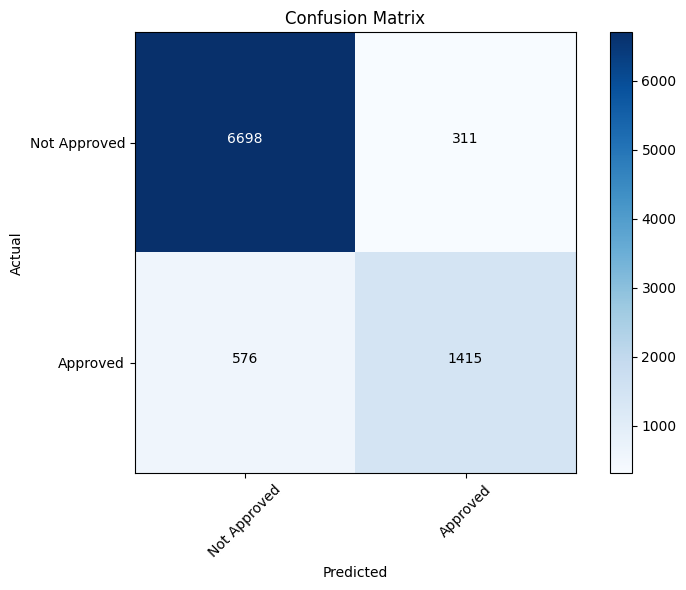

In [80]:
plot_confusion_matrix(y_test.values, y_test_pred_knn)

<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; color:#000000;">

# <span style="color:#4CAF50; font-family:Arial;">Application of Project</span>

Discuss the real-world applications of the project, such as predicting loan approval based on user data.

</div>


In [81]:
import pandas as pd
import numpy as np

# Define the Min-Max scaling function
def min_max_scaling(df, min_values, max_values):
    return (df - min_values) / (max_values - min_values)

# Prediction function
def predict_loan_status(input_array):
    predictions = []
    knn_predictions = []
    
    for input_data in input_array:
        # Convert input_data to dictionary
        input_data = {
            'person_age': float(input_data[0]),
            'person_gender': input_data[1],
            'person_education': input_data[2],
            'person_income': float(input_data[3]),
            'person_emp_exp': int(input_data[4]),
            'person_home_ownership': input_data[5],
            'loan_amnt': float(input_data[6]),
            'loan_intent': input_data[7],
            'loan_int_rate': float(input_data[8]),
            'loan_percent_income': float(input_data[9]),
            'cb_person_cred_hist_length': float(input_data[10]),
            'credit_score': int(input_data[11]),
            'previous_loan_defaults_on_file': input_data[12]
        }

        # Apply the mappings to the input data
        input_data['person_gender'] = gender_mapping[input_data['person_gender']]
        input_data['person_home_ownership'] = home_ownership_mapping[input_data['person_home_ownership']]
        input_data['loan_intent'] = loan_intent_mapping[input_data['loan_intent']]
        input_data['previous_loan_defaults_on_file'] = previous_loan_defaults_on_file_mapping[input_data['previous_loan_defaults_on_file']]
        input_data['person_education'] = education_mapping[input_data['person_education']]

        # Convert input data to DataFrame
        input_df = pd.DataFrame([input_data])

        # Scaling and feature engineering
        min_values = X_train.min()
        max_values = X_train.max()
        input_scaled = min_max_scaling(input_df, min_values, max_values)
    
        # Predict the loan status using logistic regression
        logistic_prediction = predict(input_scaled, w, b)
        predictions.append(int(logistic_prediction[0]))

        # Predict the loan status using KNN
        knn_prediction = knn_predict_vectorized(X_train_np, y_train_np, input_scaled.values, k)
        knn_predictions.append(int(knn_prediction[0]))
    
    return predictions, knn_predictions

# Example input array
input_array = np.array([
    [23.0, 'male', 'Associate', 120810.0, 3, 'MORTGAGE', 20000.0, 'DEBTCONSOLIDATION', 11.36, 0.17, 3.0, 541, 'Yes'],
    [26.0, 'female', 'Associate', 145225.0, 0, 'RENT', 14000.0, 'VENTURE', 11.01, 0.1, 4.0, 607, 'Yes'],
    [26.0, 'female', 'Bachelor', 121187.0, 4, 'MORTGAGE', 14000.0, 'EDUCATION', 13.11, 0.12, 2.0, 572, 'Yes'],
    [23.0, 'female', 'Bachelor', 147377.0, 2, 'RENT', 14000.0, 'DEBTCONSOLIDATION', 13.48, 0.09, 2.0, 678, 'Yes'],
    [25.0, 'female', 'High School', 121230.0, 0, 'MORTGAGE', 15000.0, 'MEDICAL', 12.73, 0.12, 4.0, 535, 'Yes'],
    [24.0, 'male', 'Bachelor', 120944.0, 0, 'MORTGAGE', 25000.0, 'VENTURE', 15.33, 0.21, 2.0, 659, 'Yes'],
    [22.0, 'male', 'Master', 37192.0, 0, 'OWN', 7500.0, 'EDUCATION', 11.01, 0.2, 2.0, 653, 'No'],
    [24.0, 'male', 'Bachelor', 120880.0, 1, 'OWN', 24000.0, 'HOMEIMPROVEMENT', 10.99, 0.2, 4.0, 493, 'Yes'],
    [22.0, 'female', 'Master', 154715.0, 0, 'RENT', 14000.0, 'DEBTCONSOLIDATION', 8.94, 0.09, 3.0, 633, 'No'],
    [25.0, 'female', 'High School', 121301.0, 4, 'MORTGAGE', 14000.0, 'MEDICAL', 10.25, 0.12, 2.0, 618, 'No'],
    [31.0, 'male', 'Master', 136832.0, 9, 'RENT', 12319.0, 'PERSONAL', 16.92, 0.09, 7.0, 722, 'No'],
    [24.0, 'male', 'High School', 37786.0, 0, 'MORTGAGE', 13500.0, 'EDUCATION', 13.43, 0.36, 4.0, 612, 'No'],
    [23.0, 'female', 'Bachelor', 40925.0, 0, 'RENT', 9000.0, 'PERSONAL', 11.01, 0.22, 4.0, 487, 'No'],
    [27.0, 'female', 'High School', 35512.0, 4, 'RENT', 5000.0, 'PERSONAL', 15.83, 0.14, 5.0, 505, 'No'],
    [24.0, 'female', 'Associate', 31924.0, 2, 'RENT', 12229.0, 'MEDICAL', 10.7, 0.38, 4.0, 678, 'No'],
    [27.0, 'male', 'Associate', 47971.0, 6, 'RENT', 15000.0, 'MEDICAL', 15.66, 0.31, 3.0, 645, 'No'],
    [37.0, 'female', 'Associate', 65800.0, 17, 'RENT', 9000.0, 'HOMEIMPROVEMENT', 14.07, 0.14, 11.0, 621, 'No'],
    [33.0, 'male', 'Associate', 56942.0, 7, 'RENT', 2771.0, 'DEBTCONSOLIDATION', 10.02, 0.05, 10.0, 668, 'No'],
    [29.0, 'male', 'Bachelor', 33164.0, 4, 'RENT', 12000.0, 'EDUCATION', 13.23, 0.36, 6.0, 604, 'No'],
    [24.0, 'male', 'High School', 51609.0, 1, 'RENT', 6665.0, 'DEBTCONSOLIDATION', 17.05, 0.13, 3.0, 1000, 'No']
])
# Predict the loan status for the example input array
predicted_statuses, knn_predicted_statuses = predict_loan_status(input_array)
print(f'Predicted Loan Statuses (Logistic Regression): {predicted_statuses}')
print(f'Predicted Loan Statuses (KNN): {knn_predicted_statuses}')

Predicted Loan Statuses (Logistic Regression): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
Predicted Loan Statuses (KNN): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]


In [82]:
import pickle as pk

# Save the model parameters w and b
model_params = {'w': w, 'b': b}
pk.dump(model_params, open('model.pkl', 'wb'))

In [1]:
import pickle as pk
import gradio as gr

# Load the model
model = pk.load(open('model.pkl', 'rb'))

def loan_prediction(person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file):
    # Create DataFrame
    input_data = pd.DataFrame(
        [[person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file]],
        columns=[
            'person_age',
            'person_gender',
            'person_education',
            'person_income',
            'person_emp_exp',
            'person_home_ownership',
            'loan_amnt',
            'loan_intent',
            'loan_int_rate',
            'loan_percent_income',
            'cb_person_cred_hist_length',
            'credit_score',
            'previous_loan_defaults_on_file'
        ]
    )

    # Apply mappings to the DataFrame
    input_data['person_gender'] = input_data['person_gender'].map(gender_mapping)
    input_data['person_home_ownership'] = input_data['person_home_ownership'].map(home_ownership_mapping)
    input_data['loan_intent'] = input_data['loan_intent'].map(loan_intent_mapping)
    input_data['previous_loan_defaults_on_file'] = input_data['previous_loan_defaults_on_file'].map(previous_loan_defaults_on_file_mapping)
    input_data['person_education'] = input_data['person_education'].map(education_mapping)

    # Ensure all features are present before scaling
    all_features = ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']

    min_values = X_train.min()
    max_values = X_train.max()
    # Scale the features
    input_data[all_features] = min_max_scaling(input_data[all_features], min_values, max_values)

    # Extract weights and bias from the loaded model
    w = model['w']
    b = model['b']

    # Make predictions using logistic regression
    logistic_predictions = predict(input_data.values, w, b)

    # Make predictions using KNN
    knn_predictions = knn_predict_vectorized(X_train_np, y_train_np, input_data.values, k)

    logistic_result = 'Approved' if logistic_predictions[0] == 1 else 'Rejected'
    knn_result = 'Approved' if knn_predictions[0] == 1 else 'Rejected'

    return f'Logistic Regression: {logistic_result} \nKNN: {knn_result}'

# Gradio interface
inputs = [
    gr.Slider(minimum=18, maximum=150, value=29, label='Age'),
    gr.Radio(choices=['male', 'female'], value='male', label='Gender'),
    gr.Dropdown(choices=['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'], value='High School', label='Education'),
    gr.Slider(minimum=0, maximum=10000000, value=33164, label='Income'),
    gr.Slider(minimum=0, maximum=100, value=4, label='Employment Experience (years)'),
    gr.Dropdown(choices=['RENT', 'OTHER', 'MORTGAGE', 'OWN'], value='RENT', label='Home Ownership'),
    gr.Slider(minimum=0, maximum=10000000, value=100000, label='Loan Amount'),
    gr.Dropdown(choices=['PERSONAL', 'EDUCATION', 'MEDICAL', 'HOMEIMPROVEMENT', 'VENTURE', 'DEBTCONSOLIDATION'], value='PERSONAL', label='Loan Intent'),
    gr.Slider(minimum=0.0, maximum=100.0, value=50.0, label='Loan Interest Rate'),
    gr.Slider(minimum=0.0, maximum=1.0, value=1.0, label='Loan Percent Income'),
    gr.Slider(minimum=0, maximum=100, value=50, label='Credit History Length'),
    gr.Slider(minimum=100, maximum=1000, value=604, label='Credit Score'),
    gr.Radio(choices=['No', 'Yes'], value='No', label='Previous Loan Defaults')
]

outputs = gr.Textbox(label='Prediction')

gr.Interface(fn=loan_prediction, inputs=inputs, outputs=outputs, title='Loan Prediction App').launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
